In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

In [2]:
TFile *file = TFile::Open("../Tracks_Clusters.root");
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print();

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

# Excercise 1

In [3]:
Float_t mu = -1;
tree->SetBranchAddress("mu_average",&mu);
TCanvas *canvas = new TCanvas("Canvas","Canvas",800,600);
TH1F *hist_mu = new TH1F("MU","Average interactions;Mu average;Events",99,1,100);

In [4]:
int nentries,nbytes,i;
nentries=(Int_t) tree->GetEntries();
for(i=0;i<nentries;i++){
    nbytes=tree->GetEntry(i);
    hist_mu->Fill(mu);
}
std::cout<<"Done"<<std::endl;

Done


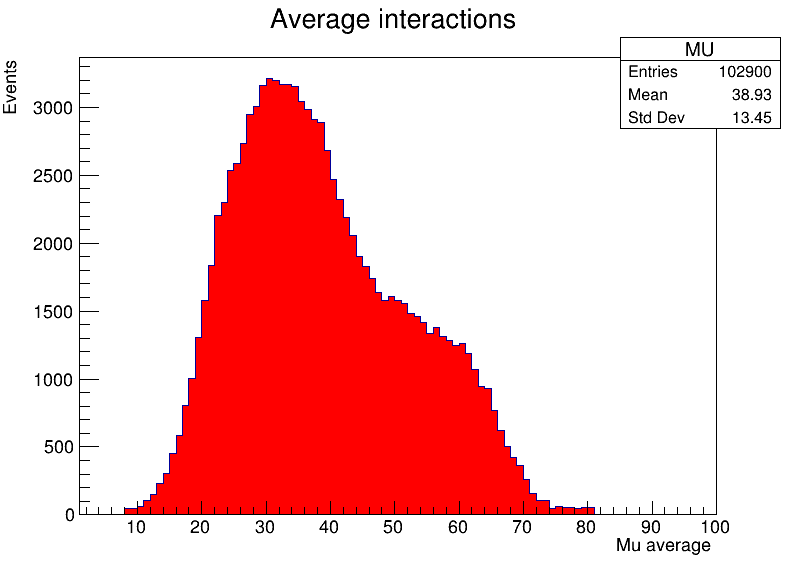

Info in <TCanvas::Print>: png file Images/mu.png has been created


In [5]:
hist_mu->SetFillColor(kRed);
hist_mu->Draw();
canvas->Draw();
canvas->SaveAs("Images/mu.png");

# Excercise 2

In [6]:
UInt_t npv = -1;
Float_t mu_average = -1;

tree->SetBranchAddress("NPV",&npv);
tree->SetBranchAddress("mu_average",&mu_average);
TCanvas *canvas = new TCanvas("Canvas","Canvas",800,600);
TH2C *NPV_MU = new TH2C("NPV_MU","NPV vs Average interactions;Mu average;NPV",80,0,100,40,0,50);


int nentries,nbytes,i;
nentries=(Int_t) tree->GetEntries();
for(i=0;i<nentries;i++){
    nbytes=tree->GetEntry(i);
    NPV_MU->Fill(mu_average,npv);
}
std::cout<<"Done"<<std::endl;

Done


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


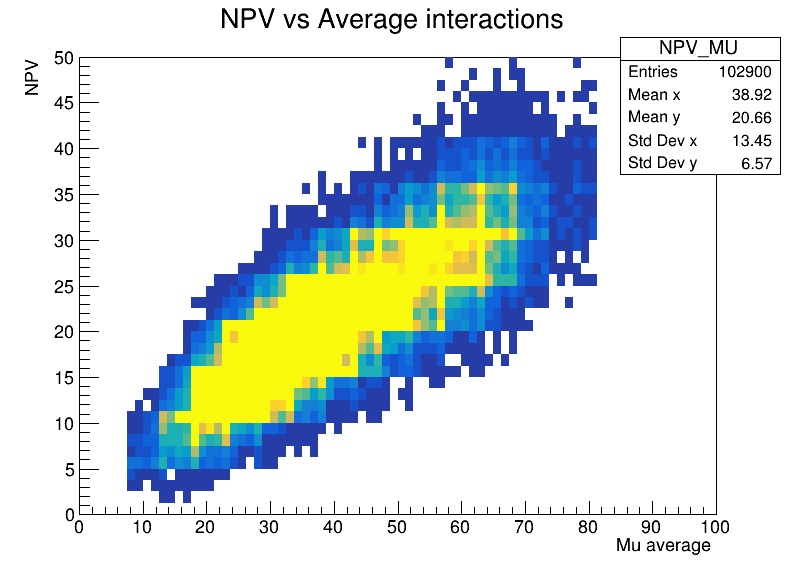

Info in <TCanvas::Print>: png file Images/npv_mu.png has been created


In [7]:
NPV_MU->SetFillColor(kBlue);
NPV_MU->Draw("col");
canvas->Draw();
canvas->SaveAs("Images/npv_mu.png");

# Excercise 3

In [8]:
vector<float> *tracks_pt;
vector<float> *clusters_pt;

tree->SetBranchAddress("Tracks_pt",&tracks_pt);
tree->SetBranchAddress("Clusters_pt",&clusters_pt);
    
TH2F *NPV_nTracks = new TH2F("NPV_nTracks","NPV vs nTracks;nTracks;NPV",1000,0,3000,49,0,50);
TH2F *NPV_nClusters = new TH2F("NPV_nClusters","NPV vs nClusters;nClusters;NPV",700,0,1800,49,0,50);
TH2F *mu_nTracks = new TH2F("mu_nTracks","mu_average vs nTracks;nTracks;mu",1000,0,3000,99,0,100);
TH2F *mu_nClusters = new TH2F("mu_nClusters","mu_average vs nClusters;nClusters;mu",700,0,1800,99,0,100);

In [9]:
for(i=0;i<nentries;i++){
    nbytes=nbytes=tree->GetEntry(i);
    NPV_nTracks->Fill(tracks_pt->size(),npv);
    NPV_nClusters->Fill(clusters_pt->size(),npv);
    mu_nTracks->Fill(tracks_pt->size(),mu_average);
    mu_nClusters->Fill(clusters_pt->size(),mu_average);
}
std::cout<<"Done"<<std::endl;

Done


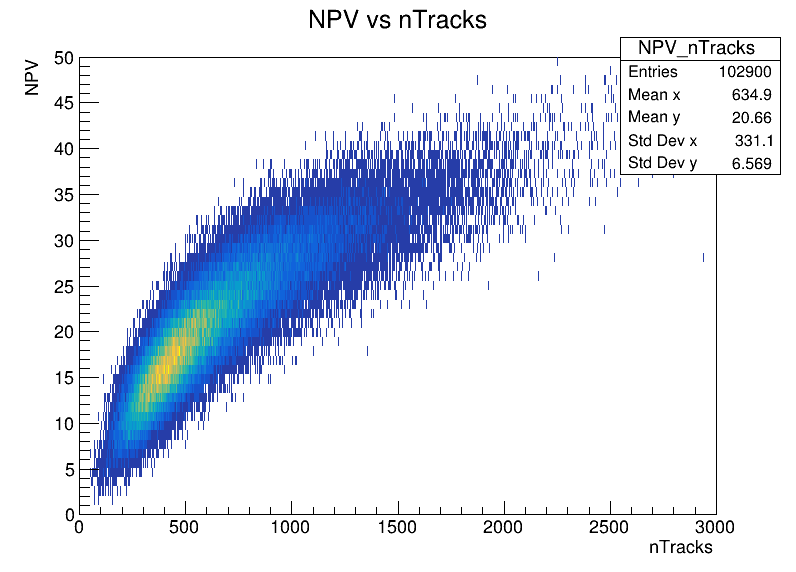

Info in <TCanvas::Print>: png file Images/npv_ntracks.png has been created


In [10]:
NPV_nTracks->SetFillColor(kGreen);
NPV_nTracks->Draw("col");
canvas->Draw();
canvas->SaveAs("Images/npv_ntracks.png");

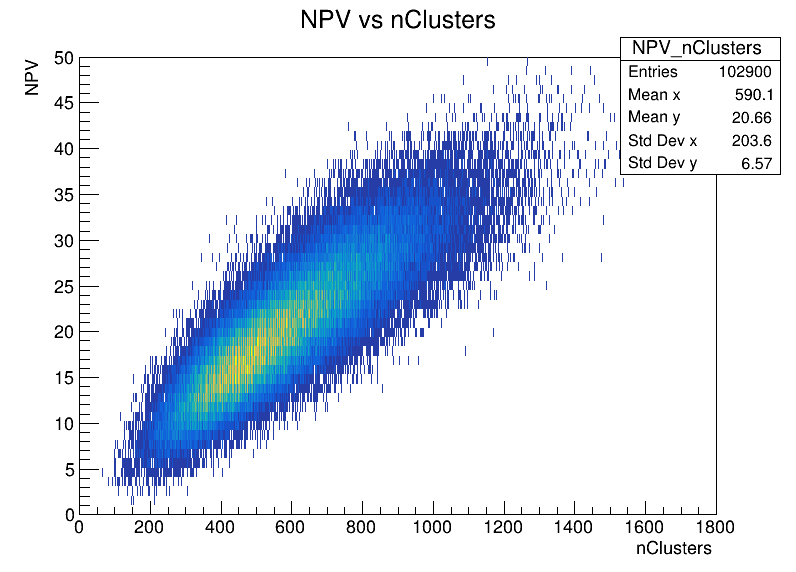

Info in <TCanvas::Print>: png file Images/npv_nclusters.png has been created


In [11]:
NPV_nClusters->SetFillColor(kYellow);
NPV_nClusters->Draw("col");
canvas->Draw();
canvas->SaveAs("Images/npv_nclusters.png");

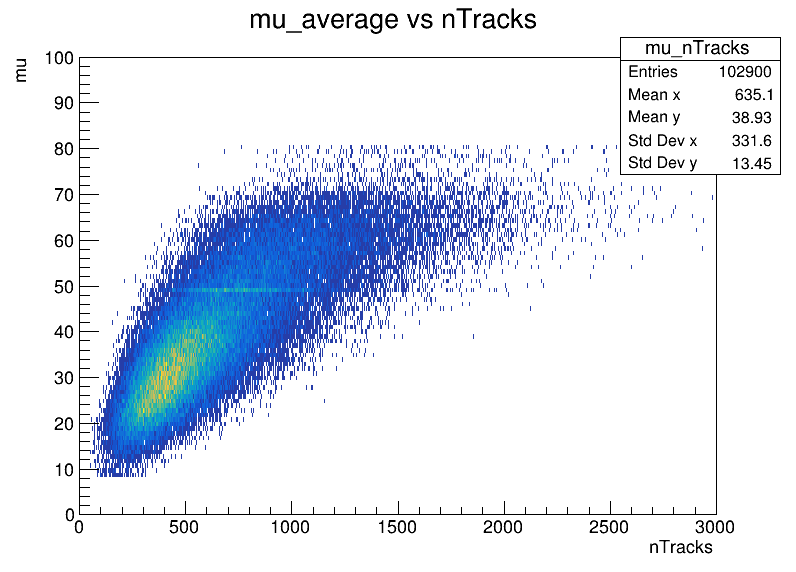

Info in <TCanvas::Print>: png file Images/mu_ntracks.png has been created


In [12]:
mu_nTracks->SetFillColor(kBlue);
mu_nTracks->Draw("col");
canvas->Draw();
canvas->SaveAs("Images/mu_ntracks.png");

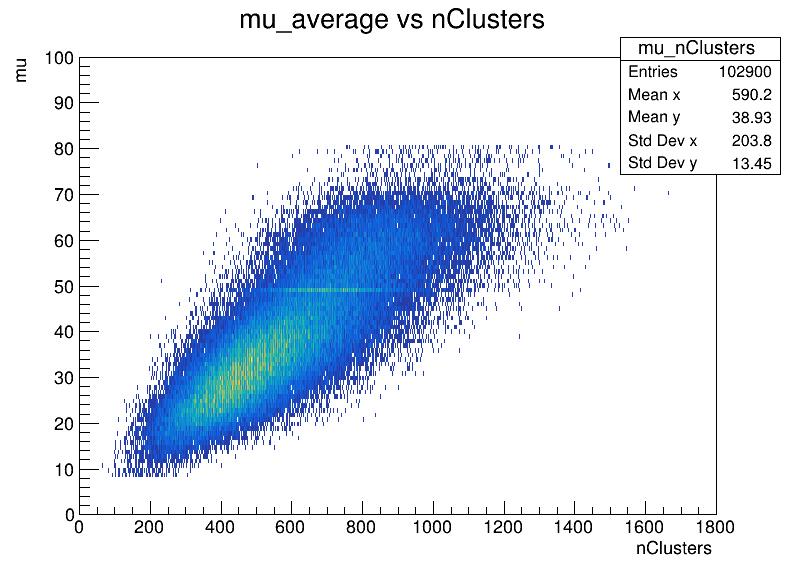

Info in <TCanvas::Print>: png file Images/mu_nclusters.png has been created


In [13]:
mu_nClusters->SetFillColor(kBlue);
mu_nClusters->Draw("col");
canvas->Draw();
canvas->SaveAs("Images/mu_nclusters.png");

# Excercise 4

In [14]:
vector<float> *tracks_pt;
vector<float> *tracks_eta;
vector<float> *tracks_phi;
vector<float> *tracks_m;
vector<float> *tracks_vtx;

vector<float> *clusters_pt;
vector<float> *clusters_eta;
vector<float> *clusters_phi;
vector<float> *clusters_m;

vector<float> *particles_pt;
vector<float> *particles_eta;
vector<float> *particles_phi;
vector<float> *particles_m;
vector<int> *particles_pdgID;

tree->SetBranchAddress("Tracks_pt",&tracks_pt);
tree->SetBranchAddress("Tracks_eta",&tracks_eta);
tree->SetBranchAddress("Tracks_phi",&tracks_phi);
tree->SetBranchAddress("Tracks_m",&tracks_m);
tree->SetBranchAddress("Tracks_vtx",&tracks_vtx);

tree->SetBranchAddress("Clusters_pt",&clusters_pt);
tree->SetBranchAddress("Clusters_eta",&clusters_eta);
tree->SetBranchAddress("Clusters_phi",&clusters_phi);
tree->SetBranchAddress("Clusters_m",&clusters_m);

tree->SetBranchAddress("Particles_pt",&particles_pt);
tree->SetBranchAddress("Particles_eta",&particles_eta);
tree->SetBranchAddress("Particles_phi",&particles_phi);
tree->SetBranchAddress("Particles_m",&particles_m);
tree->SetBranchAddress("Particles_pdgID",&particles_pdgID);

TH1F *htracks_pt = new TH1F("Tracks pt","Track pT;pT (MeV);Events",1000,0,3000);
TH1F *htracks_eta = new TH1F("Tracks eta","Track eta;eta ;Events",20,-5,5);
TH1F *htracks_phi = new TH1F("Tracks phi","Track phi;phi (rad);Events",100,-4,4);
TH1F *htracks_m = new TH1F("Tracks m","Track m;m;Events",20,0,150);
TH1F *htracks_vtx = new TH1F("Tracks vtx","Track vtx;vtx;Events",30,0,40);

TH1F *hclusters_pt = new TH1F("Clusters pt","Cluster pT;pT (MeV);Events",1000,0,3500);
TH1F *hclusters_eta = new TH1F("Clusters eta","Cluster eta;eta;Events",20,-5,5);
TH1F *hclusters_phi = new TH1F("Clusters phi","Cluster phi;phi (rad);Events",100,-4,4);
TH1F *hclusters_m = new TH1F("Clusters m","Cluster m;m;Events",20,0,5);

TH1F *hparticles_pt = new TH1F("Particles pt","Particles pT;pT (MeV);Events",1000,0,2000);
TH1F *hparticles_eta = new TH1F("Particles eta","Particles eta;eta;Events",20,-5,5);
TH1F *hparticles_phi = new TH1F("Particles phi","Particles phi;phi (rad);Events",100,-4,4);
TH1F *hparticles_m = new TH1F("Particles m","Particles m;m;Events",60,0,1500);
TH1F *hparticles_pdgID = new TH1F("Particles pdgID","Particles pdgID;pdgID;Events",100,0,500);

In [31]:
std::cout<<tracks_pt->size()<<"\n"
         <<tracks_eta->size()<<"\n"
         <<tracks_phi->size()<<"\n"
         <<tracks_m->size()<<"\n"
         <<tracks_vtx->size()<<"\n"
         <<clusters_pt->size()<<"\n"
         <<clusters_eta->size()<<"\n"
         <<clusters_phi->size()<<"\n"
         <<clusters_m->size()<<"\n"
         <<particles_pt->size()<<"\n"
         <<particles_eta->size()<<"\n"
         <<particles_phi->size()<<"\n"
         <<particles_m->size()<<"\n"
         <<particles_pdgID->size()<<std::endl;

1266
1266
1266
1266
1266
1100
1100
1100
1100
631
631
631
631
631


In [16]:
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<tracks_pt->size(); tr++){
        htracks_pt->Fill(tracks_pt->at(tr));
        htracks_eta->Fill(tracks_eta->at(tr));
        htracks_phi->Fill(tracks_phi->at(tr));
        htracks_m->Fill(tracks_m->at(tr));
        htracks_vtx->Fill(tracks_vtx->at(tr));
    }
    for(int tr=0; tr<clusters_pt->size(); tr++){
        hclusters_pt->Fill(clusters_pt->at(tr));
        hclusters_eta->Fill(clusters_eta->at(tr));
        hclusters_phi->Fill(clusters_phi->at(tr));
        hclusters_m->Fill(clusters_m->at(tr));
    }
    for(int tr=0; tr<particles_pt->size(); tr++){
        hparticles_pt->Fill(particles_pt->at(tr));
        hparticles_eta->Fill(particles_eta->at(tr));
        hparticles_phi->Fill(particles_phi->at(tr));
        hparticles_m->Fill(particles_m->at(tr));
        hparticles_pdgID->Fill(particles_pdgID->at(tr));
    }
}

std::cout << "Done!" << std::endl;

Done!


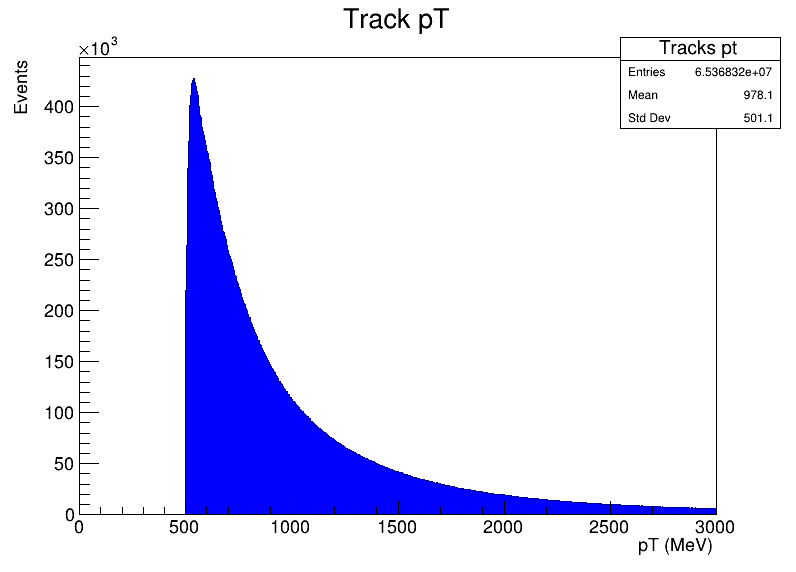

Info in <TCanvas::Print>: png file Images/htracks_pt.png has been created


In [17]:
htracks_pt->SetFillColor(kBlue);
htracks_pt->Draw();
canvas->Draw();
canvas->SaveAs("Images/htracks_pt.png");

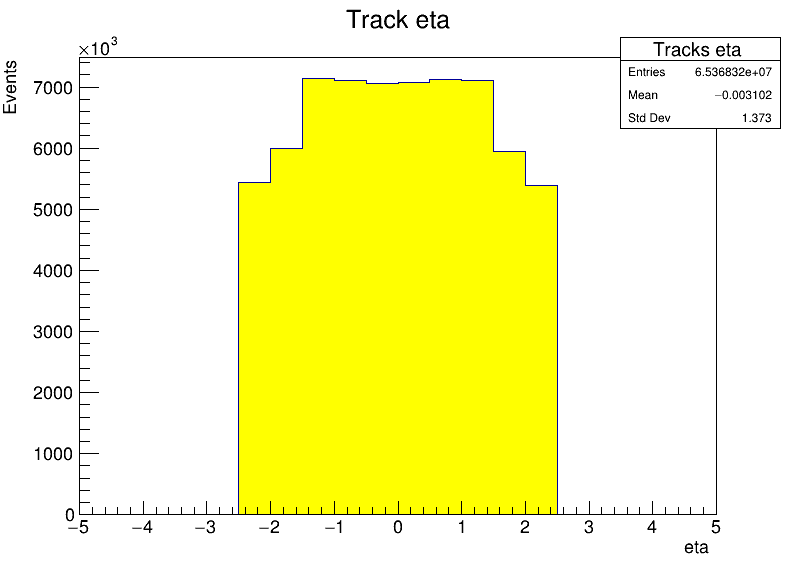

Info in <TCanvas::Print>: png file Images/htracks_eta.png has been created


In [18]:
htracks_eta->SetFillColor(kYellow);
htracks_eta->Draw();
canvas->Draw();
canvas->SaveAs("Images/htracks_eta.png");

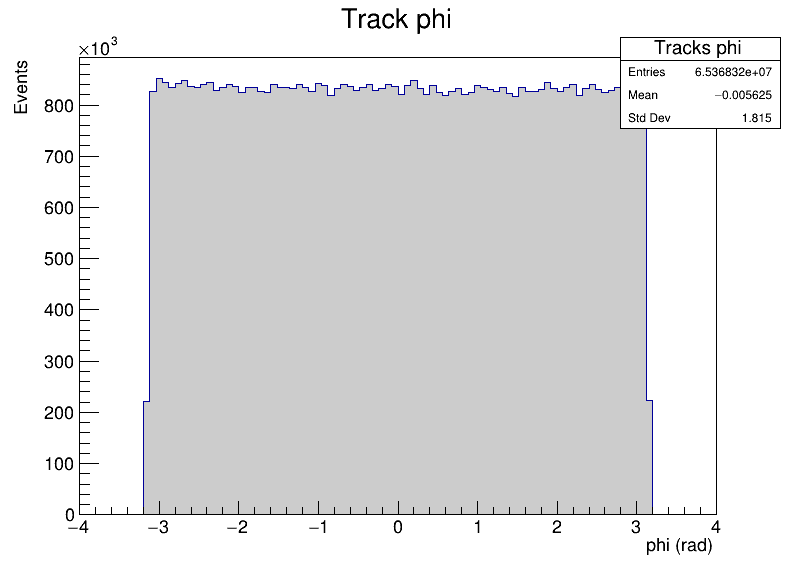

Info in <TCanvas::Print>: png file Images/htracks_phi.png has been created


In [19]:
htracks_phi->SetFillColor(kGray);
htracks_phi->Draw();
canvas->Draw();
canvas->SaveAs("Images/htracks_phi.png");

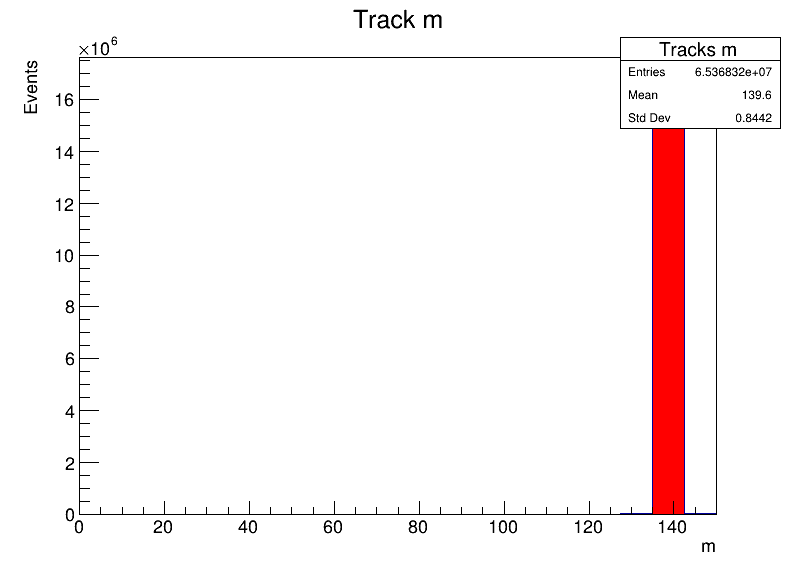

Info in <TCanvas::Print>: png file Images/htracks_m.png has been created


In [20]:
htracks_m->SetFillColor(kRed);
htracks_m->Draw();
canvas->Draw();
canvas->SaveAs("Images/htracks_m.png");

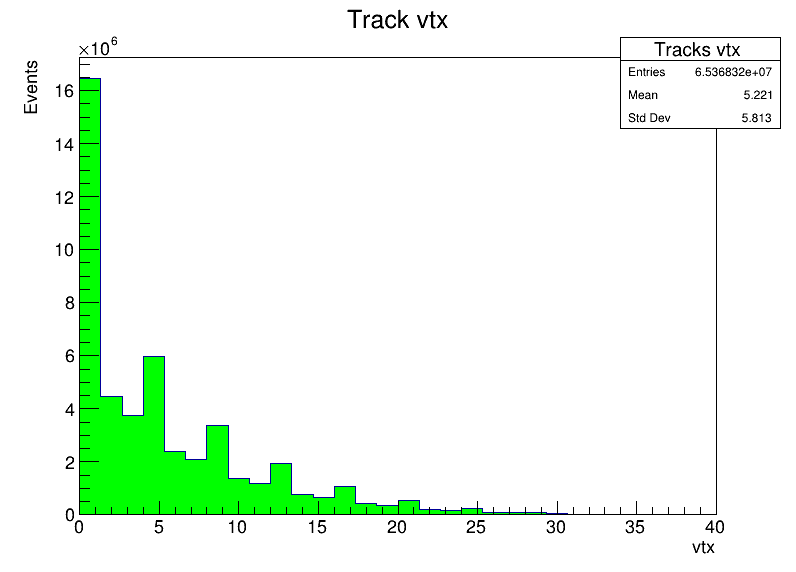

Info in <TCanvas::Print>: png file Images/htracks_vtx.png has been created


In [21]:
htracks_vtx->SetFillColor(kGreen);
htracks_vtx->Draw();
canvas->Draw();
canvas->SaveAs("Images/htracks_vtx.png");

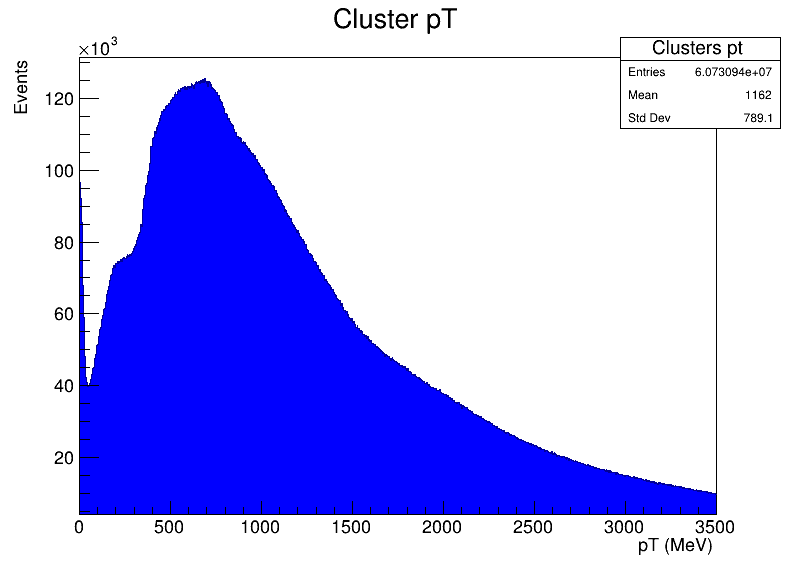

Info in <TCanvas::Print>: png file Images/hclusters_pt.png has been created


In [22]:
hclusters_pt->SetFillColor(kBlue);
hclusters_pt->Draw();
canvas->Draw();
canvas->SaveAs("Images/hclusters_pt.png");

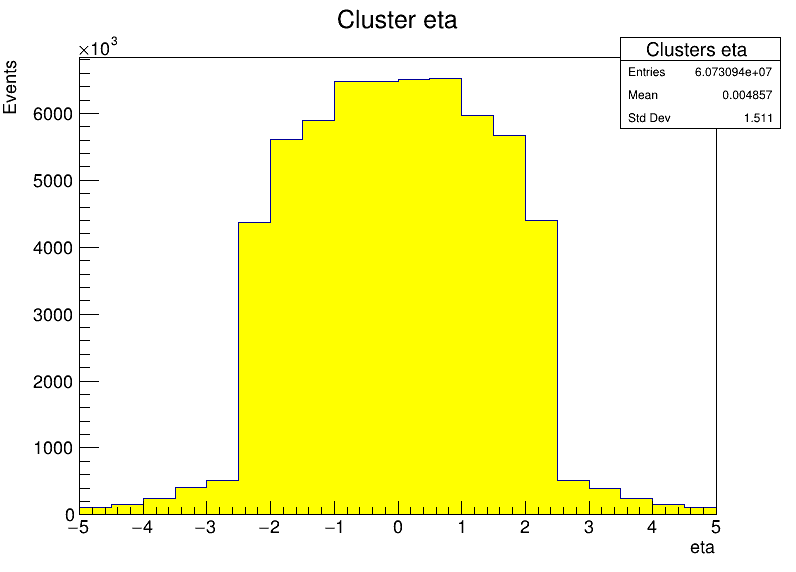

Info in <TCanvas::Print>: png file Images/hclusters_eta.png has been created


In [23]:
hclusters_eta->SetFillColor(kYellow);
hclusters_eta->Draw();
canvas->Draw();
canvas->SaveAs("Images/hclusters_eta.png");

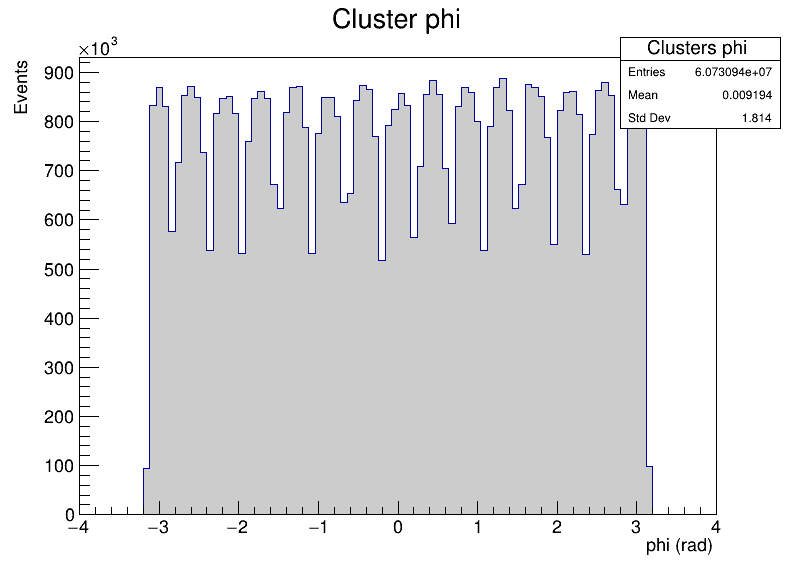

Info in <TCanvas::Print>: png file Images/hclusters_phi.png has been created


In [24]:
hclusters_phi->SetFillColor(kGray);
hclusters_phi->Draw();
canvas->Draw();
canvas->SaveAs("Images/hclusters_phi.png");

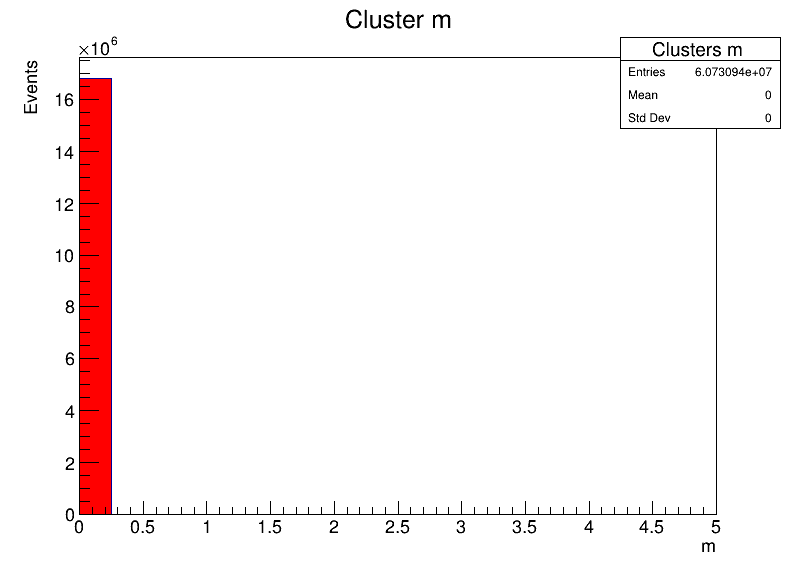

Info in <TCanvas::Print>: png file Images/hclusters_m.png has been created


In [25]:
hclusters_m->SetFillColor(kRed);
hclusters_m->Draw();
canvas->Draw();
canvas->SaveAs("Images/hclusters_m.png");

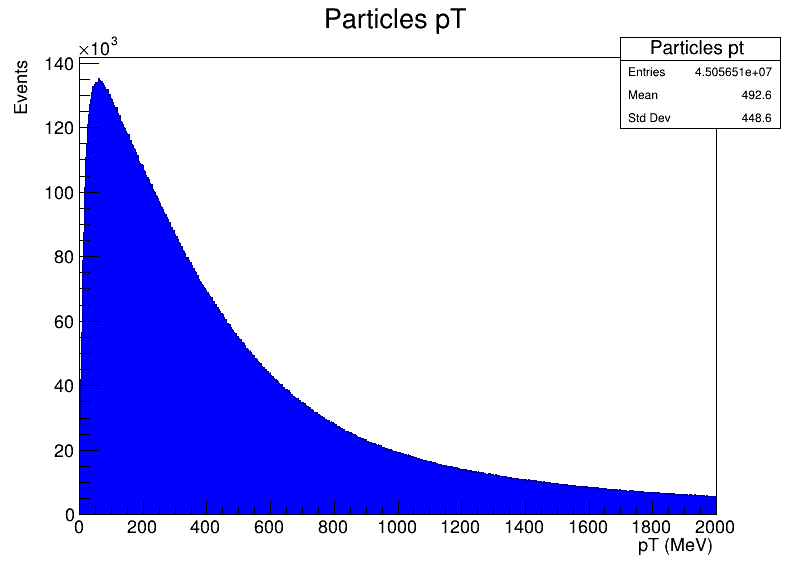

Info in <TCanvas::Print>: png file Images/hparticles_pt.png has been created


In [26]:
hparticles_pt->SetFillColor(kBlue);
hparticles_pt->Draw();
canvas->Draw();
canvas->SaveAs("Images/hparticles_pt.png");

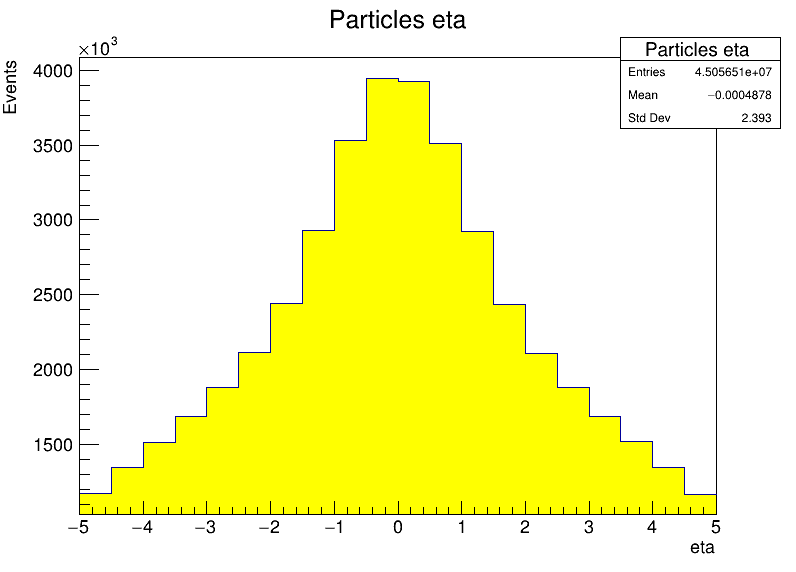

Info in <TCanvas::Print>: png file Images/hparticles_eta.png has been created


In [27]:
hparticles_eta->SetFillColor(kYellow);
hparticles_eta->Draw();
canvas->Draw();
canvas->SaveAs("Images/hparticles_eta.png");

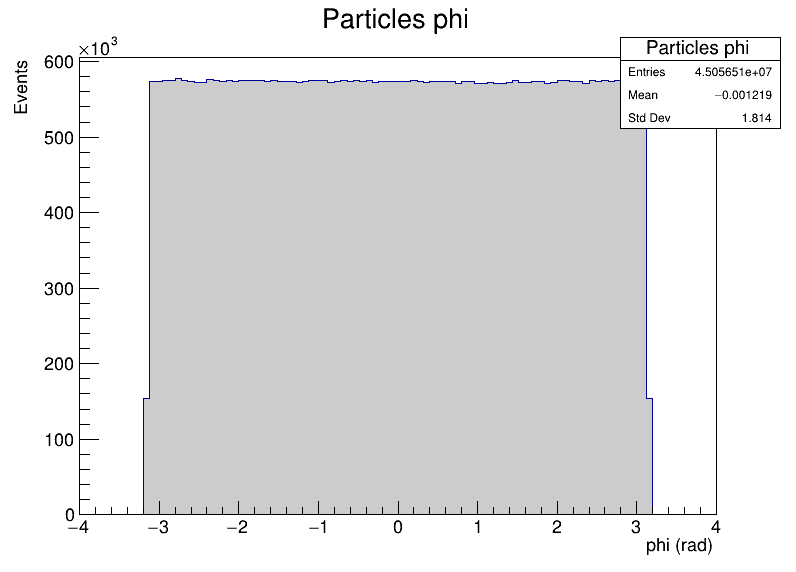

Info in <TCanvas::Print>: png file Images/hparticles_phi.png has been created


In [28]:
hparticles_phi->SetFillColor(kGray);
hparticles_phi->Draw();
canvas->Draw();
canvas->SaveAs("Images/hparticles_phi.png");

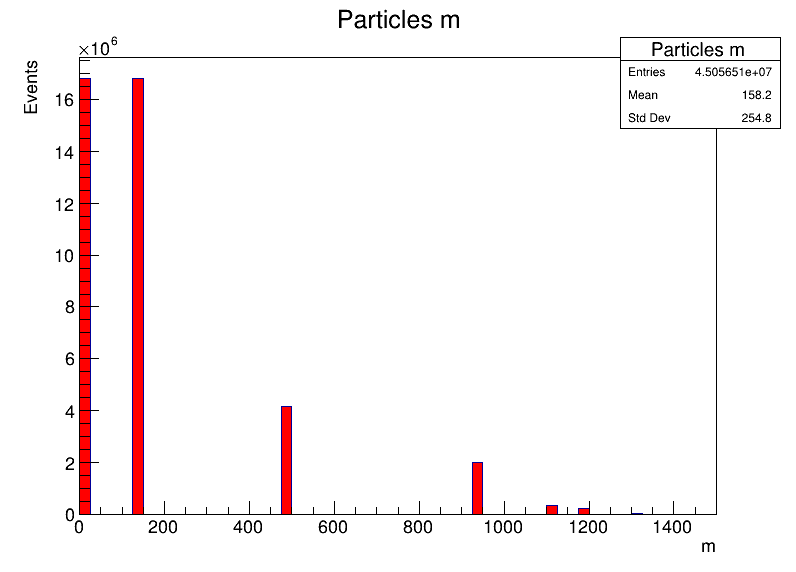

Info in <TCanvas::Print>: png file Images/hparticles_m.png has been created


In [29]:
hparticles_m->SetFillColor(kRed);
hparticles_m->Draw();
canvas->Draw();
canvas->SaveAs("Images/hparticles_m.png");

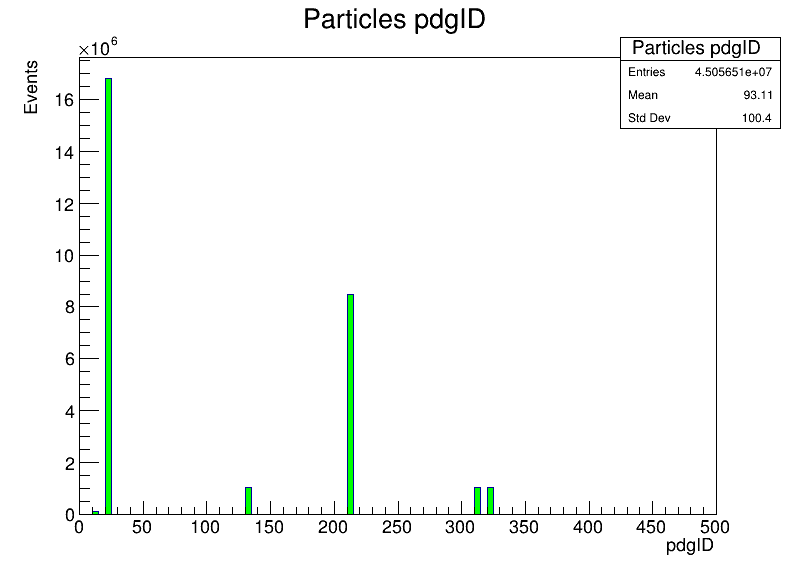

Info in <TCanvas::Print>: png file Images/hparticles_pdgID.png has been created


In [30]:
hparticles_pdgID->SetFillColor(kGreen);
hparticles_pdgID->Draw();
canvas->Draw();
canvas->SaveAs("Images/hparticles_pdgID.png");

# Excercise 5

Los tracks con la reconstrucción de los caminos que tomaron las partículas al momento de la dispersión, los clusters la información proporcionada por los calorímetros del detector y las partículas se refieren al tipo correspondiente de partícula generada en los impactos. En adición cada uno de estos datos presenta ramas de información que difieren unas de otras, pero que en los tres representa un mismo atributo.   

Tracks_pt, Clusters_pt y Particles_pt contienen el momento lineal transverso (proyección del momento lineal en el plano xy) de cada una de las particulas a lo largo del camino y de los calorímetros, en los eventos realizados; este incrementa o disminuye a medida que la partícula se ve más o menos afectada por el campo magnético externo. 

Tracks_eta, Clusters_eta y Particles_eta referencian la desviación al eje z de los caminos, partículas y clusters de los calorímetros en base a la unidad de medida del ángulo polar redefinida como $\eta=-Ln(\tan(\theta/2))$, y cuyo rango es $-\infty<\eta<\infty$ dependiendo del sector en que se encuentre la partícula.

Tracks_phi, Clusters_phi y Particles_phi expresan la posición angular azimutal de cada uno de los tracks, clusters y partículas desprendidas en cada uno de los eventos; esta unidad se toma en el intervalo $-\pi\leq\phi<\pi$ respecto al eje $x$.

Tracks_m, Clusters_m y Particles_m 

Tracks_vtx almacena la cantidad de tracks que emergen de un determinado vertice; cada uno de los vertices del evento tiene asignado un número que lo identifica, posteriormente permite la identificación de las particulas provenientes de este vertice. 

# Excercise 6

El atributo "Particle PDG ID" es un código de identificación para cada una de las particulas, tanto las elementales, como las particulas compuestas como los hadrones, e incluso los nucleos atómicos. Las particulas de materia se identifican con números positivos, mientras que las antiparticulas con valores negativos; adicionalmente, en algunas particulas como los hadrones, los códigos de identificación se basan en el contenido de los quarks y en los números cuanticos de estos. 